# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("computingvictor/transactions-fraud-datasets")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/computingvictor/transactions-fraud-datasets/versions/1


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# 1. Import pustaka untuk analisis data
import pandas as pd
import numpy as np

# 2. Import pustaka untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Import pustaka untuk pemrosesan data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import os

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
path = "/root/.cache/kagglehub/datasets/computingvictor/transactions-fraud-datasets/versions/1"
print("Files in directory:", os.listdir(path))
file_path = os.path.join(path, 'transactions_data.csv')
df = pd.read_csv(file_path)

Files in directory: ['users_data.csv', 'train_fraud_labels.json', 'transactions_data.csv', 'cards_data.csv', 'mcc_codes.json']


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
print("Jumlah Baris dan Kolom:", df.shape)
print("Tipe Data Setiap Kolom:\n", df.dtypes)
df.head()

Jumlah Baris dan Kolom: (13305915, 12)
Tipe Data Setiap Kolom:
 id                  int64
date               object
client_id           int64
card_id             int64
amount             object
use_chip           object
merchant_id         int64
merchant_city      object
merchant_state     object
zip               float64
mcc                 int64
errors             object
dtype: object


,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN


In [ ]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 id                       0
date                     0
client_id                0
card_id                  0
amount                   0
use_chip                 0
merchant_id              0
merchant_city            0
merchant_state     1563700
zip                1652706
mcc                      0
errors            13094522
dtype: int64


In [ ]:
# Statistik deskriptif
print(df.describe())

                 id     client_id       card_id   merchant_id           zip  \
count  1.330592e+07  1.330592e+07  1.330592e+07  1.330592e+07  1.165321e+07   
mean   1.558402e+07  1.026812e+03  3.475268e+03  4.772376e+04  5.132782e+04   
std    4.704499e+06  5.816386e+02  1.674356e+03  2.581534e+04  2.940423e+04   
min    7.475327e+06  0.000000e+00  0.000000e+00  1.000000e+00  1.001000e+03   
25%    1.150604e+07  5.190000e+02  2.413000e+03  2.588700e+04  2.860200e+04   
50%    1.557087e+07  1.070000e+03  3.584000e+03  4.592600e+04  4.767000e+04   
75%    1.965361e+07  1.531000e+03  4.901000e+03  6.757000e+04  7.790100e+04   
max    2.376187e+07  1.998000e+03  6.144000e+03  1.003420e+05  9.992800e+04   

                mcc  
count  1.330592e+07  
mean   5.565440e+03  
std    8.757002e+02  
min    1.711000e+03  
25%    5.300000e+03  
50%    5.499000e+03  
75%    5.812000e+03  
max    9.402000e+03  


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [ ]:
# Menampilkan jumlah baris dan kolom dalam dataset
print(f"Jumlah Baris dan Kolom: {df.shape}")

# Menampilkan jumlah kolom
print(f"Jumlah Kolom: {df.shape[1]}")

# Menampilkan jumlah baris
print(f"Jumlah Baris: {df.shape[0]}")

# Menghitung jumlah total data (baris × kolom)
total_data = df.shape[0] * df.shape[1]
print(f"Jumlah Total Data di Dataset: {total_data}")

# Mengisi dengan mean/median/mode
#df = df.fillna(df.mean())


Jumlah Baris dan Kolom: (13305915, 12)
Jumlah Kolom: 12
Jumlah Baris: 13305915
Jumlah Total Data di Dataset: 159670980


In [ ]:
# Misalnya, kita hanya ingin mengambil 10000 baris pertama
df_subset = df.head(10000)

# Mengambil sampel acak sebanyak 1000 baris
df_subset = df.sample(10000, random_state=42)

# Menampilkan jumlah baris dan kolom dalam subset dataset
print(f"Jumlah Baris dan Kolom setelah dipotong: {df_subset.shape}")

# Menampilkan jumlah baris dan kolom dalam dataset
print(f"Jumlah Baris dan Kolom: {df_subset.shape}")

# Menampilkan jumlah kolom
print(f"Jumlah Kolom: {df_subset.shape[1]}")

# Menampilkan jumlah baris
print(f"Jumlah Baris: {df_subset.shape[0]}")

print("Missing Values:\n", df_subset.isnull().sum())

Jumlah Baris dan Kolom setelah dipotong: (10000, 12)
Jumlah Baris dan Kolom: (10000, 12)
Jumlah Kolom: 12
Jumlah Baris: 10000
Missing Values:
 id                   0
date                 0
client_id            0
card_id              0
amount               0
use_chip             0
merchant_id          0
merchant_city        0
merchant_state    1153
zip               1223
mcc                  0
errors            9855
dtype: int64


In [ ]:
# Bersihkan simbol dolar pada kolom 'amount' dan ubah ke numerik
df['amount'] = df['amount'].replace('[\$,]', '', regex=True).astype(float)

# Encode 'use_chip' menjadi 'use_chip_encoded'
df['use_chip_encoded'] = df['use_chip'].map({'Yes': 1, 'No': 0}).fillna(0)

# Tambahkan kolom 'is_weekend' berdasarkan kolom 'date'
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['day_of_week'] = df['date'].dt.dayofweek  # Senin = 0, Minggu = 6
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# Mengisi nilai hilang pada kolom numerik dengan mean
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Mengisi nilai hilang pada kolom kategorikal dengan mode
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Periksa nilai hilang setelah imputasi
print("Missing Values After Imputation:\n", df.isnull().sum())

# Buat subset data setelah imputasi
selected_features = ['amount', 'use_chip_encoded', 'mcc', 'merchant_id', 'is_weekend']
df_subset = df[selected_features]

# Periksa subset data
print("Subset Data:\n", df_subset.head())

Missing Values After Imputation:
 id                  0
date                0
client_id           0
card_id             0
amount              0
use_chip            0
merchant_id         0
merchant_city       0
merchant_state      0
zip                 0
mcc                 0
errors              0
use_chip_encoded    0
day_of_week         0
is_weekend          0
dtype: int64
Subset Data:
    amount  use_chip_encoded   mcc  merchant_id  is_weekend
0  -77.00               0.0  5499        59935           0
1   14.57               0.0  5311        67570           0
2   80.00               0.0  4829        27092           0
3  200.00               0.0  4829        27092           0
4   46.41               0.0  5813        13051           0


In [ ]:
# Menghapus data duplikat
df_subset = df_subset.drop_duplicates()
print(f"Jumlah baris setelah menghapus duplikat: {df_subset.shape[0]}")

Jumlah baris setelah menghapus duplikat: 5419504


In [ ]:
# Definisikan batas (bins) dan label untuk kategori
bin_edges = [-float('inf'), 50, 150, float('inf')]  # Batas binning
bin_labels = ['Low', 'Medium', 'High']  # Nama kategori

# Buat kolom baru untuk hasil binning
df_subset['amount_binned'] = pd.cut(df_subset['amount'], bins=bin_edges, labels=bin_labels)

# Tampilkan data setelah binning
print("Data setelah binning:\n", df_subset[['amount', 'amount_binned']].head())

# Encode kategori 'amount_binned' ke nilai numerik
amount_binned_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df_subset['amount_binned_encoded'] = df_subset['amount_binned'].map(amount_binned_mapping)

# Tampilkan data dengan encoding
print("Data setelah encoding:\n", df_subset[['amount', 'amount_binned', 'amount_binned_encoded']].head())


Data setelah binning:
    amount amount_binned
0  -77.00           Low
1   14.57           Low
2   80.00        Medium
3  200.00          High
4   46.41           Low
Data setelah encoding:
    amount amount_binned amount_binned_encoded
0  -77.00           Low                     0
1   14.57           Low                     0
2   80.00        Medium                     1
3  200.00          High                     2
4   46.41           Low                     0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Identifikasi semua kolom numerik di dataframe
numeric_cols = df_subset.select_dtypes(include=["number"]).columns

if len(numeric_cols) == 0:
    print("Tidak ada kolom numerik yang dapat dinormalisasi.")
else:
    # Normalisasi dengan MinMaxScaler hanya pada kolom numerik
    scaler = MinMaxScaler()
    df_subset[numeric_cols] = scaler.fit_transform(df_subset[numeric_cols])

    # Tampilkan data setelah normalisasi
    print("Data setelah normalisasi:\n", df_subset.head())

Data setelah normalisasi:
      amount  use_chip_encoded       mcc  merchant_id  is_weekend  \
0  0.057785               0.0  0.492524     0.597303         0.0   
1  0.070295               0.0  0.468080     0.673394         0.0   
2  0.079233               0.0  0.405409     0.269989         0.0   
3  0.095626               0.0  0.405409     0.269989         0.0   
4  0.074644               0.0  0.533351     0.130057         0.0   

  amount_binned amount_binned_encoded  
0           Low                     0  
1           Low                     0  
2        Medium                     1  
3          High                     2  
4           Low                     0  


In [ ]:
from scipy import stats

# Tentukan kolom numerik yang ada dalam df_subset
numerical_columns = df_subset.select_dtypes(include=['float64', 'int64']).columns

# Menghitung Z-scores untuk kolom numerik yang ada dalam df_subset
z_scores = stats.zscore(df_subset[numerical_columns])
abs_z_scores = np.abs(z_scores)

# Menghapus baris dengan Z-score lebih besar dari 3
df_subset = df_subset[(abs_z_scores < 3).all(axis=1)]
print(f"Jumlah baris setelah menghapus outlier menggunakan Z-score: {df_subset.shape[0]}")

# Menghitung IQR untuk kolom numerik yang ada dalam df_subset
Q1 = df_subset[numerical_columns].quantile(0.25)
Q3 = df_subset[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Menghapus baris yang berada di luar batas IQR
df_subset = df_subset[~((df_subset[numerical_columns] < (Q1 - 1.5 * IQR)) | (df_subset[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Jumlah baris setelah menghapus outlier menggunakan IQR: {df_subset.shape[0]}")

Jumlah baris setelah menghapus outlier menggunakan Z-score: 0
Jumlah baris setelah menghapus outlier menggunakan IQR: 0


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = df_subset.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df_subset[col] = label_encoder.fit_transform(df_subset[col])
print(f"Data setelah Label Encoding:\n{df_subset.head()}")

Data setelah Label Encoding:
Empty DataFrame
Columns: [amount, use_chip_encoded, mcc, merchant_id, is_weekend, amount_binned, amount_binned_encoded]
Index: []


In [ ]:
df_subset = pd.get_dummies(df_subset, columns=categorical_columns, drop_first=True)
print(f"Data setelah One-Hot Encoding:\n{df_subset.head()}")

Data setelah One-Hot Encoding:
Empty DataFrame
Columns: [amount, use_chip_encoded, mcc, merchant_id, is_weekend, amount_binned, amount_binned_encoded]
Index: []


In [ ]:
print("Tipe Data Setiap Kolom:\n", df_subset.dtypes)

Tipe Data Setiap Kolom:
 amount                    float64
use_chip_encoded          float64
mcc                       float64
merchant_id               float64
is_weekend                float64
amount_binned            category
amount_binned_encoded    category
dtype: object


In [ ]:
# Menampilkan semua nama kolom dalam DataFrame
print("Nama Kolom dalam DataFrame:", df_subset.columns)

Nama Kolom dalam DataFrame: Index(['amount', 'use_chip_encoded', 'mcc', 'merchant_id', 'is_weekend',
       'amount_binned', 'amount_binned_encoded'],
      dtype='object')


In [ ]:
# --- Feature Selection with VarianceThreshold ---

# Check if df_subset is empty
if df_subset.empty:
    print("Warning: df_subset is empty. Skipping scaling and feature selection.")
    df_subset_scaled = pd.DataFrame(columns=selected_features)  # Create an empty scaled DataFrame
    df_selected_features = pd.DataFrame()  # Create an empty DataFrame for selected features
else:
    # Scale the data
    scaler = StandardScaler()
    df_subset_scaled = pd.DataFrame(scaler.fit_transform(df_subset), columns=selected_features)

    # Apply VarianceThreshold for feature selection
    selector = VarianceThreshold(threshold=0.1)
    df_subset_selected = selector.fit_transform(df_subset_scaled)

    # Extract remaining features after feature selection
    remaining_features = selector.get_support(indices=True)
    selected_features_after_variance = [selected_features[i] for i in remaining_features]

    # Create a DataFrame with the selected features
    df_selected_features = pd.DataFrame(df_subset_selected, columns=selected_features_after_variance)

    # If 'use_chip_encoded' is missing after feature selection, re-add it
    if 'use_chip_encoded' not in selected_features_after_variance:
        df_selected_features['use_chip_encoded'] = df_subset_scaled['use_chip_encoded']

# Output for verification
print("\nData after scaling:")
print(df_subset_scaled.head())

print("\nData after feature selection:")
print(df_selected_features.head())



Data after scaling:
Empty DataFrame
Columns: [amount, use_chip_encoded, mcc, merchant_id, is_weekend]
Index: []

Data after feature selection:
Empty DataFrame
Columns: []
Index: []


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Dari Chat GPT: Langkah-Langkah yang Tepat
Berikut adalah langkah-langkah yang disarankan untuk menghindari error dan memastikan bahwa proses binning dan normalisasi berjalan lancar:

Proses Binning Terlebih Dahulu:

Lakukan binning pada fitur yang diperlukan sebelum melakukan normalisasi.
Pastikan bahwa proses binning menghasilkan kolom baru atau memodifikasi kolom yang ada sesuai kebutuhan analisis.
Definisikan selected_features Setelah Binning:

Setelah binning selesai, tentukan fitur-fitur yang ingin Anda normalisasi.
Pastikan bahwa fitur-fitur tersebut adalah numerik, karena MinMaxScaler hanya dapat diterapkan pada data numerik.
Lakukan Normalisasi:

Terapkan MinMaxScaler pada fitur-fitur yang telah dipilih.
Gunakan metode yang aman untuk menghindari kesalahan penulisan ulang dataframe, seperti menggunakan .loc.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Create df_subset with only the selected features
df_subset = df[selected_features]

# Limit the dataset to 10,000 rows
df_subset = df_subset.head(10000)  # Mengambil 10.000 baris pertama

# Check if data is still available for clustering
if df_subset.shape[0] > 0:
    # K-Means Clustering
    best_kmeans_score = -1
    best_kmeans_n_clusters = None

    silhouette_scores_kmeans = []
    range_clusters = range(4, 11)  # Cluster range for KMeans

    for n_clusters in range_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(df_subset)
        score = silhouette_score(df_subset, labels)
        silhouette_scores_kmeans.append((n_clusters, score))
        if score > best_kmeans_score:
            best_kmeans_score = score
            best_kmeans_n_clusters = n_clusters

else:
    print("No data available in df_subset for clustering.")


No NaN values left in the data after imputation.
             amount  use_chip_encoded           mcc    merchant_id  \
count  10000.000000           10000.0  10000.000000   10000.000000   
mean      40.922711               0.0   5566.945100   47674.652800   
std       77.485662               0.0    865.255169   25683.437589   
min     -500.000000               0.0   1711.000000     100.000000   
25%        8.730000               0.0   5300.000000   25887.000000   
50%       27.880000               0.0   5499.000000   45989.000000   
75%       62.732500               0.0   5813.000000   66563.250000   
max     1412.640000               0.0   9402.000000  100340.000000   

         is_weekend  
count  10000.000000  
mean       0.630000  
std        0.482828  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  
Best Agglomerative n_clusters=3 -> Silhouette Score: 0.6100452392925177


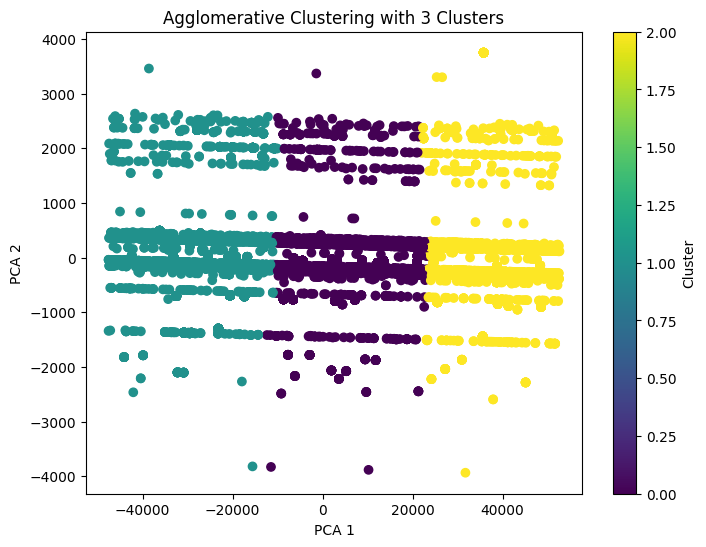


Cluster Analysis:
                          amount  use_chip_encoded          mcc   merchant_id  \
cluster_agglomerative                                                           
0                      35.237641               0.0  5463.825153  53203.656186   
1                      46.178266               0.0  5578.166667  20946.775701   
2                      41.815197               0.0  5728.027281  84045.995081   

                       is_weekend  
cluster_agglomerative              
0                        0.617076  
1                        0.642523  
2                        0.631038  


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Create df_subset with only the selected features
df_subset = df[selected_features]

# Limit the dataset to 10,000 rows
df_subset = df_subset.head(10000)

# Check if data is still available for clustering
if df_subset.shape[0] > 0:
    # Impute missing values in selected features
    imputer = SimpleImputer(strategy='mean')
    df_subset = pd.DataFrame(imputer.fit_transform(df_subset), columns=selected_features)

    # Cek apakah masih ada nilai NaN setelah imputasi
    if df_subset.isnull().sum().sum() > 0:
        print("Warning: Still NaN values in the data after imputation.")
    else:
        print("No NaN values left in the data after imputation.")

    # Periksa statistik deskriptif untuk memastikan data siap untuk clustering
    print(df_subset.describe())

    # Agglomerative Clustering
    best_agglomerative_score = -1
    best_agglomerative_n_clusters = None

    silhouette_scores_agglomerative = []
    for n_clusters in range(2, 11):  # Explore clusters from 2 to 10
        agg = AgglomerativeClustering(n_clusters=n_clusters)
        labels = agg.fit_predict(df_subset)
        score = silhouette_score(df_subset, labels)
        silhouette_scores_agglomerative.append((n_clusters, score))
        if score > best_agglomerative_score:
            best_agglomerative_score = score
            best_agglomerative_n_clusters = n_clusters

           # Print Agglomerative Clustering results
    print(f"Best Agglomerative n_clusters={best_agglomerative_n_clusters} -> Silhouette Score: {best_agglomerative_score}")

    # Visualize Agglomerative Clustering with PCA
    agg_best_model = AgglomerativeClustering(n_clusters=best_agglomerative_n_clusters)
    df_subset['cluster_agglomerative'] = agg_best_model.fit_predict(df_subset)

    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(df_subset[selected_features])

    plt.figure(figsize=(8, 6))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df_subset['cluster_agglomerative'], cmap='viridis')
    plt.title(f"Agglomerative Clustering with {best_agglomerative_n_clusters} Clusters")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.colorbar(label='Cluster')
    plt.show()

    # --- Cluster Analysis ---
    print("\nCluster Analysis:")
    cluster_analysis = df_subset.groupby('cluster_agglomerative').mean()  # Calculate mean of each feature per cluster
    print(cluster_analysis)
else:
    print("No data available in df_subset for clustering.")


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Best K-Means n_clusters=10 -> Silhouette Score: 0.5884779614712088

Cluster Summary (Descriptive Statistics per Cluster):
                   amount                    use_chip_encoded              \
                     mean  median        std             mean median  std   
cluster_kmeans                                                              
0               57.684943  42.130  84.939895              0.0    0.0  0.0   
1               43.745380  22.190  79.731839              0.0    0.0  0.0   
2               32.266211  29.140  82.703454              0.0    0.0  0.0   
3               32.846173  19.995  67.147540              0.0    0.0  0.0   
4               36.283661  19.850  86.668053              0.0    0.0  0.0   
5               41.131544  23.080  69.262826              0.0    0.0  0.0   
6               49.298165  30.010  79.809297              0.0    0.0  0.0   
7               53.425283  49.640  64.817663              0.0    0.0  0.0   
8               36.090183  31.5

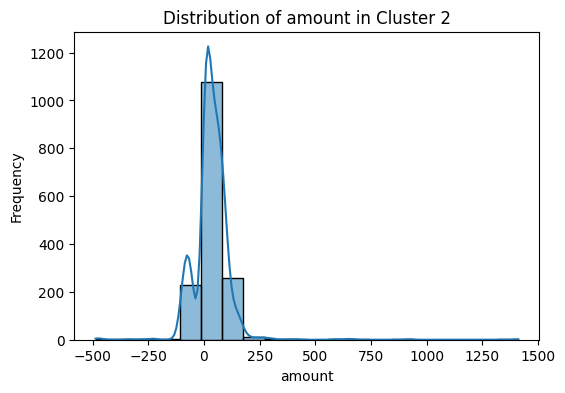

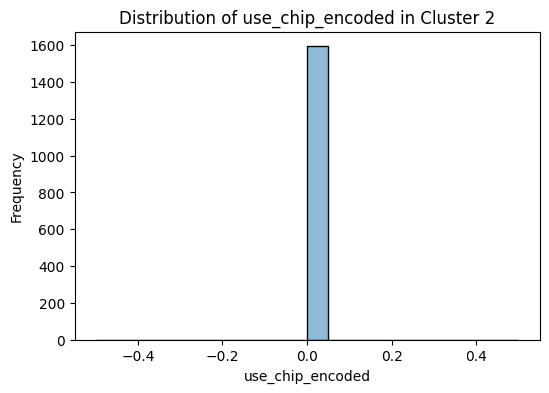

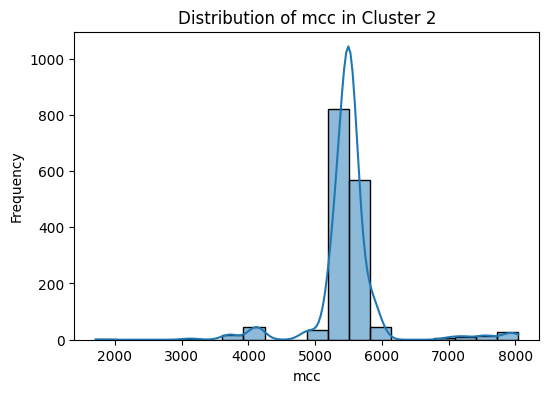

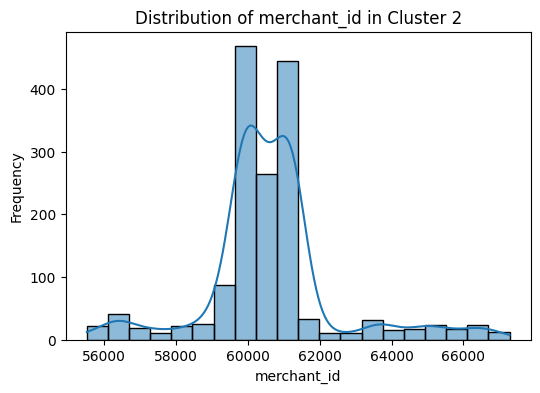

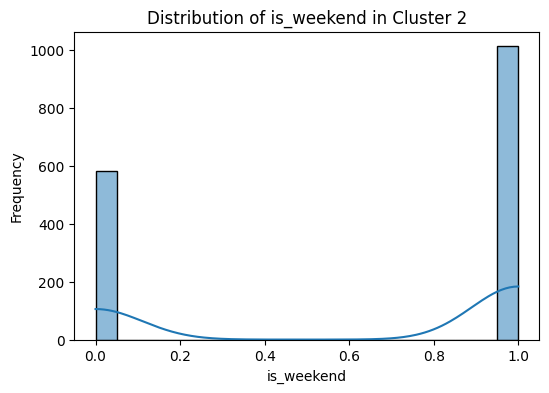


Cluster 1:
Number of Points: 1067
Mean Values:
amount                 43.745380
use_chip_encoded        0.000000
mcc                  5634.513590
merchant_id         73916.074977
is_weekend              0.608247
cluster_kmeans          1.000000
dtype: float64
Median Values:
amount                 22.19
use_chip_encoded        0.00
mcc                  5541.00
merchant_id         75781.00
is_weekend              1.00
cluster_kmeans          1.00
dtype: float64
Standard Deviations:
amount                79.731839
use_chip_encoded       0.000000
mcc                  789.351566
merchant_id         3255.356174
is_weekend             0.488371
cluster_kmeans         0.000000
dtype: float64


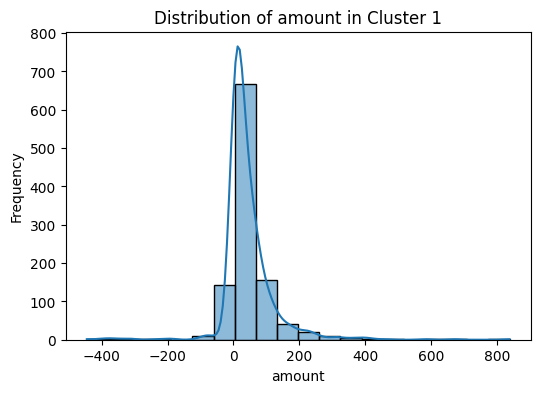

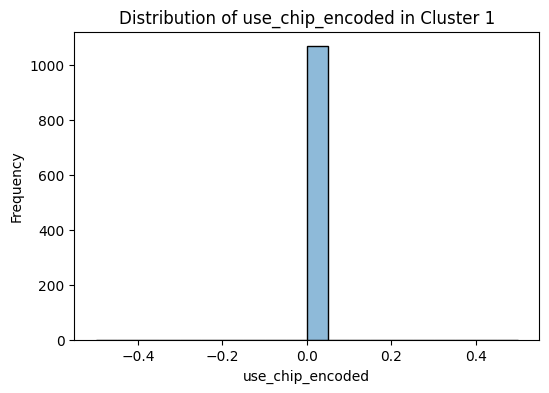

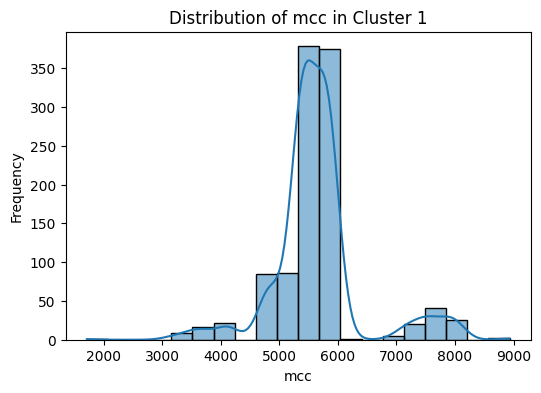

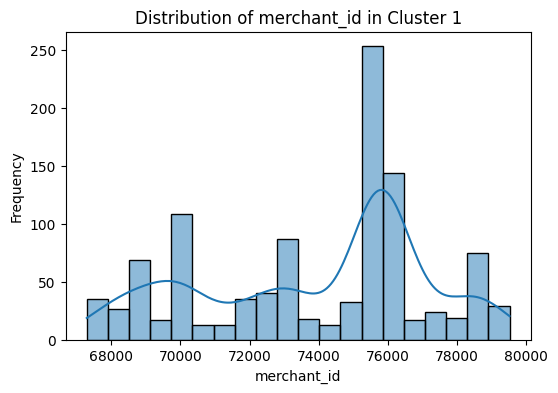

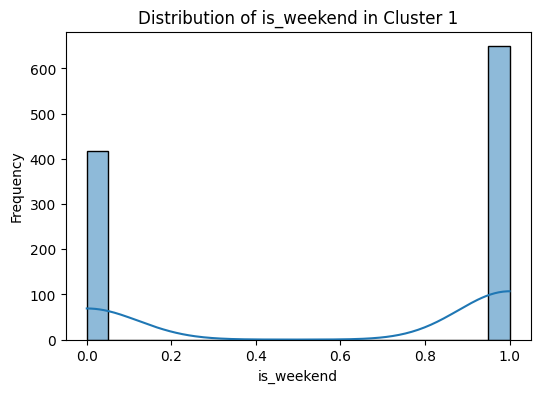


Cluster 7:
Number of Points: 1323
Mean Values:
amount                 53.425283
use_chip_encoded        0.000000
mcc                  5411.677249
merchant_id         25474.663643
is_weekend              0.642479
cluster_kmeans          7.000000
dtype: float64
Median Values:
amount                 49.64
use_chip_encoded        0.00
mcc                  5541.00
merchant_id         26810.00
is_weekend              1.00
cluster_kmeans          7.00
dtype: float64
Standard Deviations:
amount                64.817663
use_chip_encoded       0.000000
mcc                  724.516511
merchant_id         2101.007831
is_weekend             0.479451
cluster_kmeans         0.000000
dtype: float64


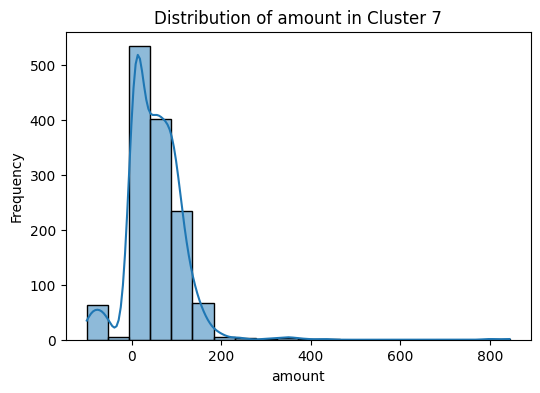

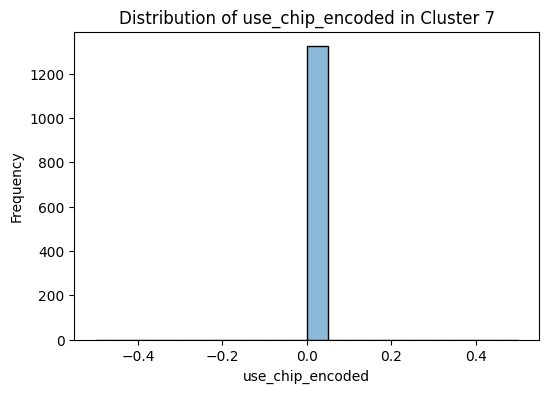

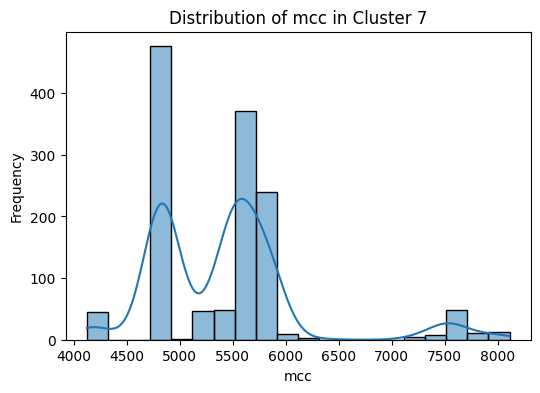

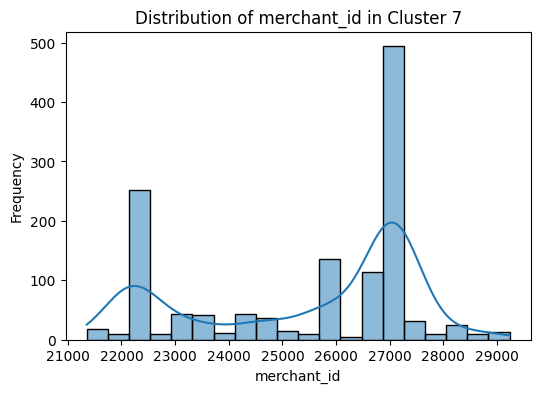

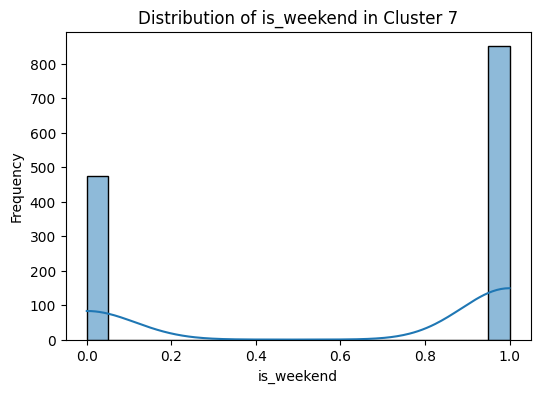


Cluster 3:
Number of Points: 1364
Mean Values:
amount                 32.846173
use_chip_encoded        0.000000
mcc                  5390.219208
merchant_id         17205.527859
is_weekend              0.637830
cluster_kmeans          3.000000
dtype: float64
Median Values:
amount                 19.995
use_chip_encoded        0.000
mcc                  5499.000
merchant_id         16869.000
is_weekend              1.000
cluster_kmeans          3.000
dtype: float64
Standard Deviations:
amount                67.147540
use_chip_encoded       0.000000
mcc                  947.871011
merchant_id         2631.000178
is_weekend             0.480804
cluster_kmeans         0.000000
dtype: float64


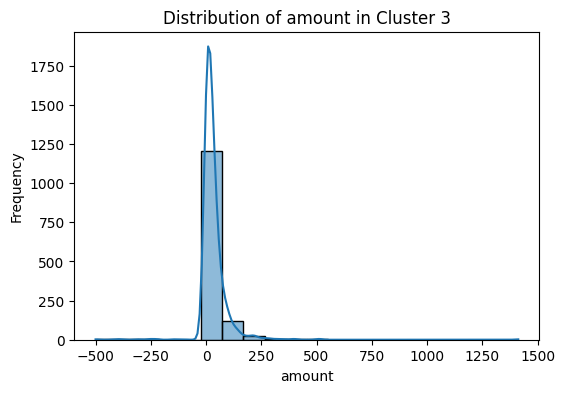

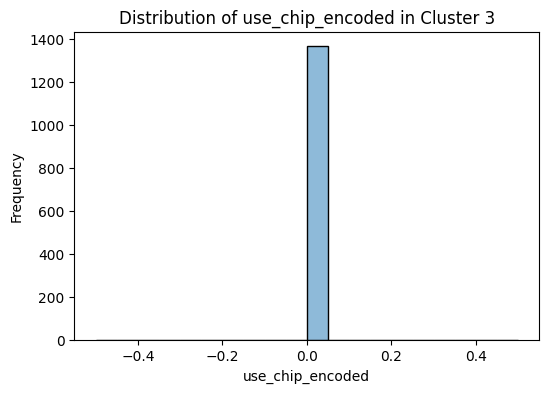

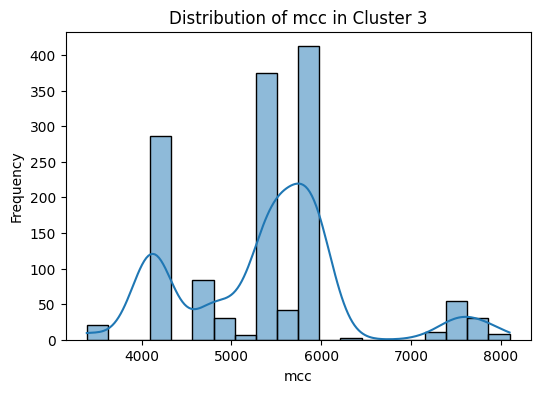

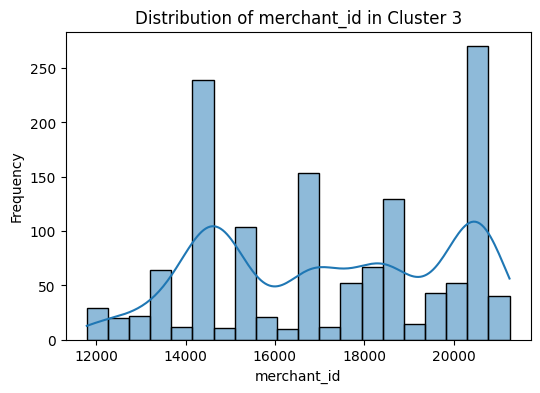

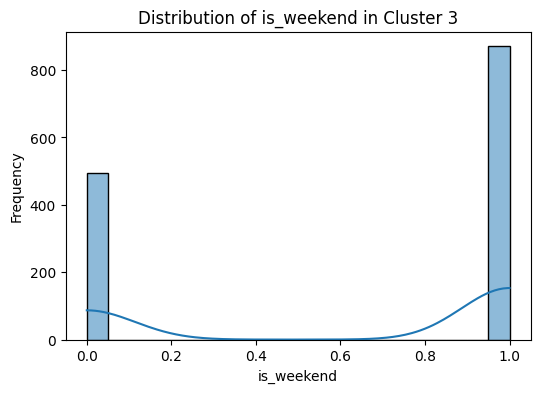


Cluster 8:
Number of Points: 1090
Mean Values:
amount                 36.090183
use_chip_encoded        0.000000
mcc                  5320.660550
merchant_id         41360.836697
is_weekend              0.585321
cluster_kmeans          8.000000
dtype: float64
Median Values:
amount                 31.505
use_chip_encoded        0.000
mcc                  5499.000
merchant_id         41160.500
is_weekend              1.000
cluster_kmeans          8.000
dtype: float64
Standard Deviations:
amount                87.145928
use_chip_encoded       0.000000
mcc                  738.656402
merchant_id         2286.547978
is_weekend             0.492893
cluster_kmeans         0.000000
dtype: float64


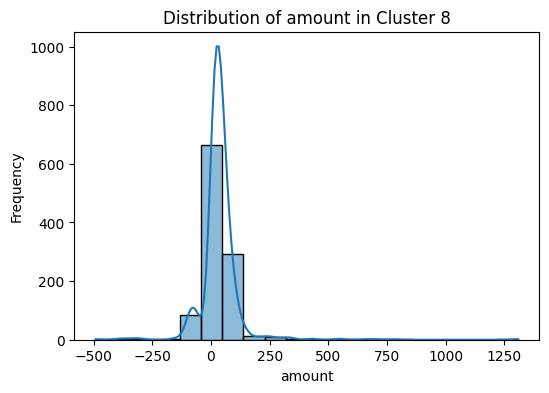

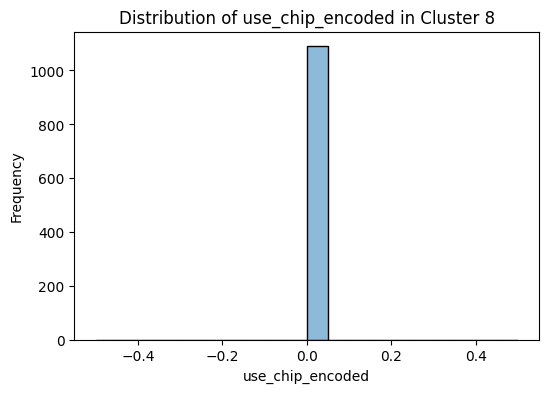

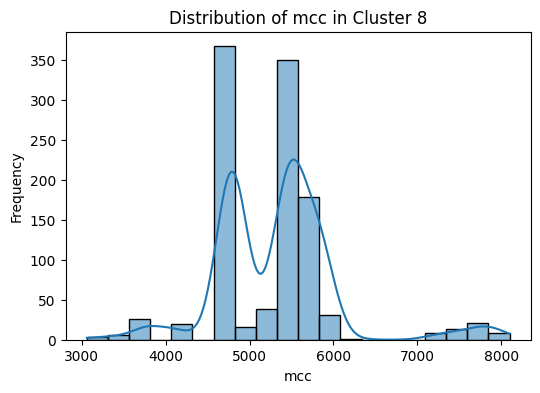

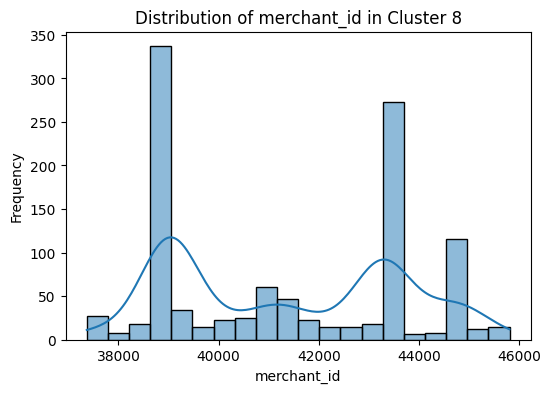

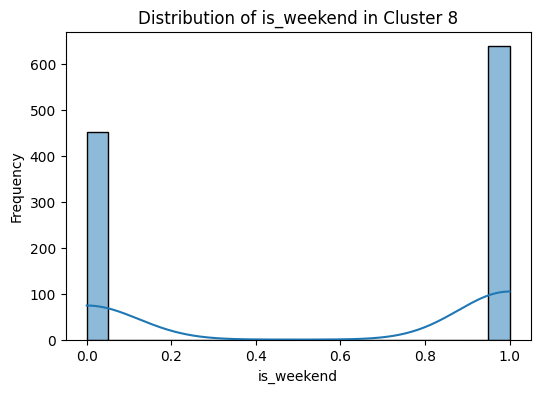


Cluster 4:
Number of Points: 978
Mean Values:
amount                 36.283661
use_chip_encoded        0.000000
mcc                  5524.696319
merchant_id         50288.212679
is_weekend              0.621677
cluster_kmeans          4.000000
dtype: float64
Median Values:
amount                 19.85
use_chip_encoded        0.00
mcc                  5411.00
merchant_id         50783.00
is_weekend              1.00
cluster_kmeans          4.00
dtype: float64
Standard Deviations:
amount                86.668053
use_chip_encoded       0.000000
mcc                  759.441125
merchant_id         2505.070433
is_weekend             0.485217
cluster_kmeans         0.000000
dtype: float64


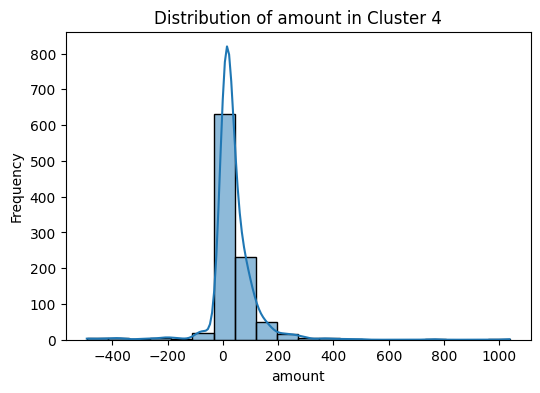

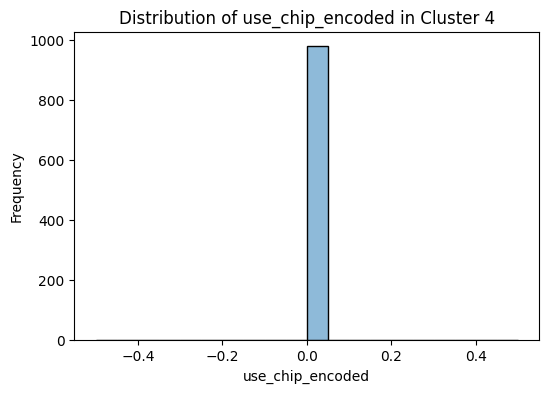

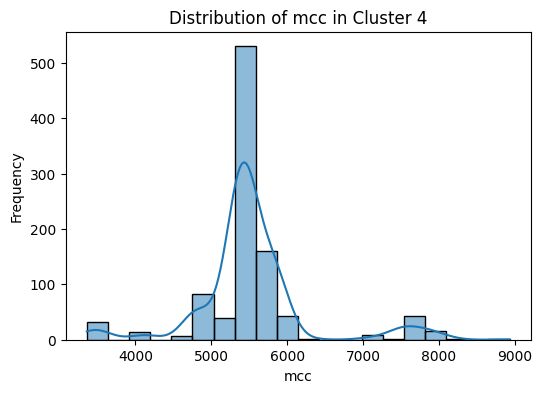

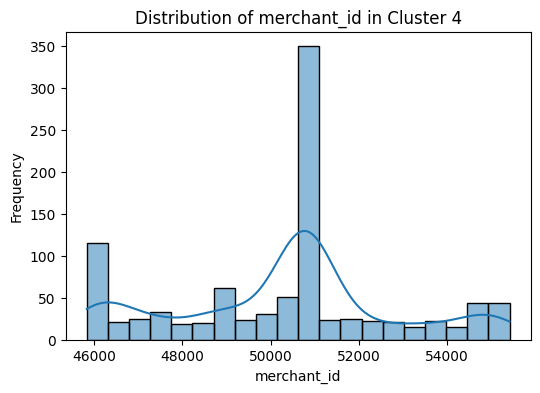

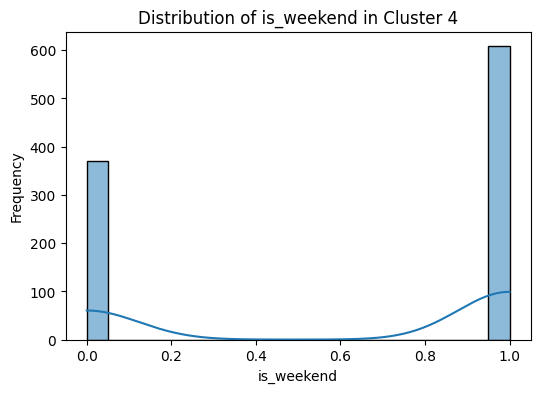


Cluster 6:
Number of Points: 556
Mean Values:
amount                49.298165
use_chip_encoded       0.000000
mcc                 5710.064748
merchant_id         6020.541367
is_weekend             0.660072
cluster_kmeans         6.000000
dtype: float64
Median Values:
amount                30.01
use_chip_encoded       0.00
mcc                 5812.00
merchant_id         5533.00
is_weekend             1.00
cluster_kmeans         6.00
dtype: float64
Standard Deviations:
amount                79.809297
use_chip_encoded       0.000000
mcc                  845.487460
merchant_id         3797.999969
is_weekend             0.474111
cluster_kmeans         0.000000
dtype: float64


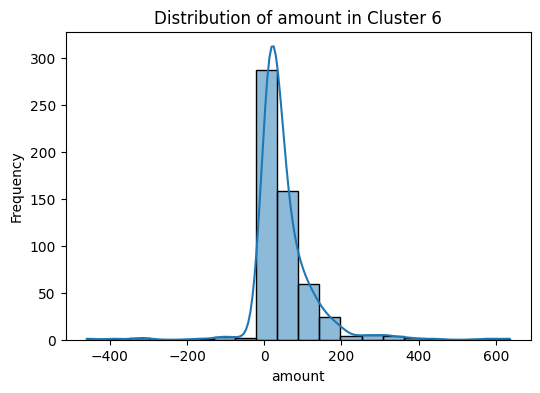

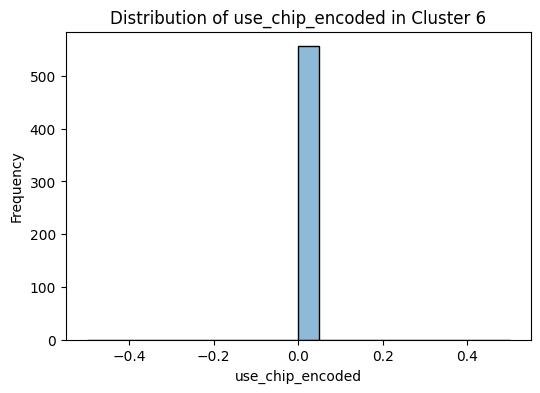

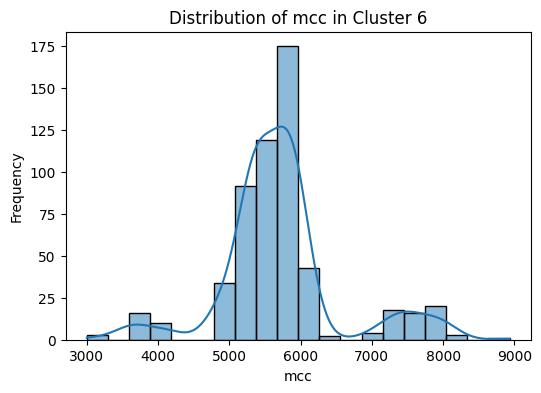

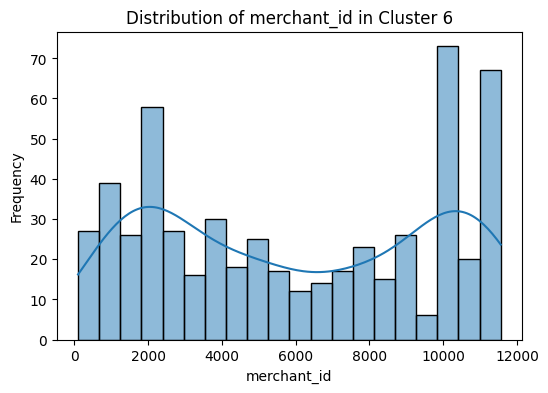

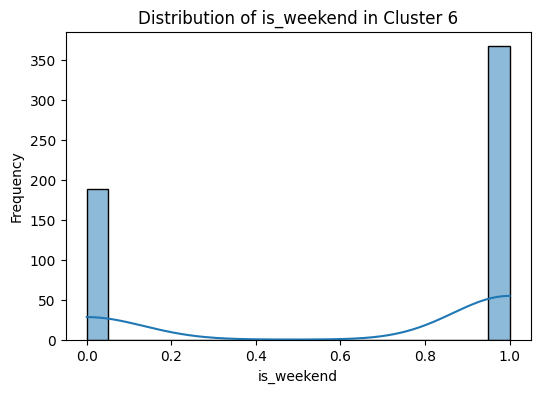


Cluster 0:
Number of Points: 611
Mean Values:
amount                 57.684943
use_chip_encoded        0.000000
mcc                  6223.909984
merchant_id         33123.086743
is_weekend              0.638298
cluster_kmeans          0.000000
dtype: float64
Median Values:
amount                 42.13
use_chip_encoded        0.00
mcc                  5812.00
merchant_id         32606.00
is_weekend              1.00
cluster_kmeans          0.00
dtype: float64
Standard Deviations:
amount                84.939895
use_chip_encoded       0.000000
mcc                 1133.209785
merchant_id         2065.109465
is_weekend             0.480887
cluster_kmeans         0.000000
dtype: float64


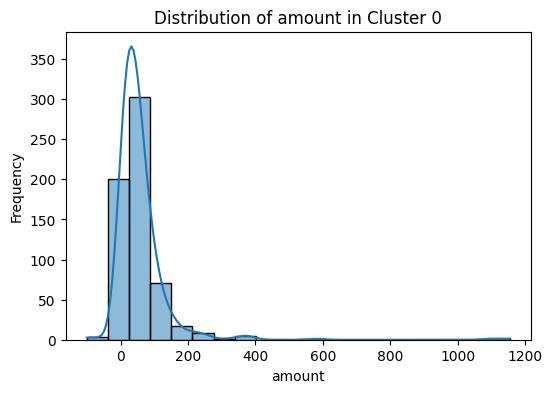

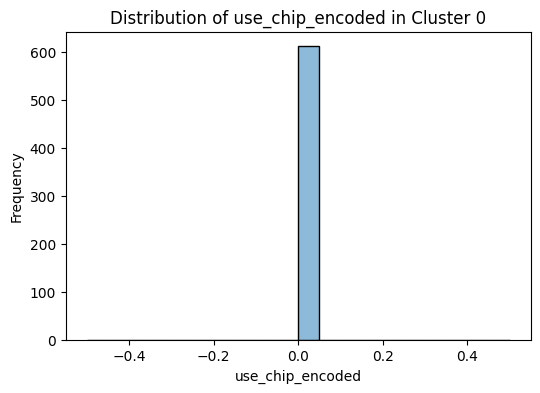

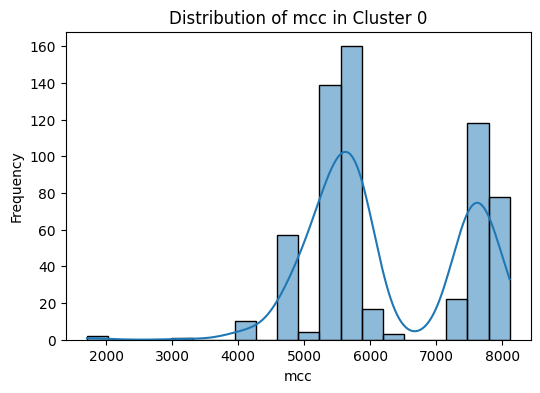

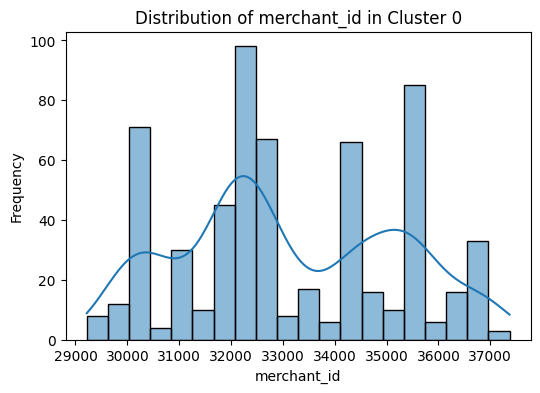

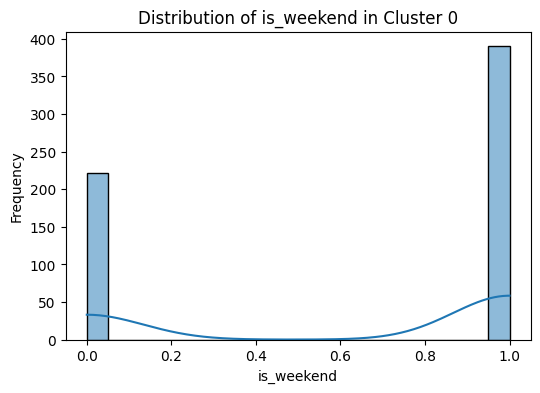


Cluster 5:
Number of Points: 907
Mean Values:
amount                 41.131544
use_chip_encoded        0.000000
mcc                  5826.478501
merchant_id         85210.484013
is_weekend              0.674752
cluster_kmeans          5.000000
dtype: float64
Median Values:
amount                 23.08
use_chip_encoded        0.00
mcc                  5499.00
merchant_id         86334.00
is_weekend              1.00
cluster_kmeans          5.00
dtype: float64
Standard Deviations:
amount                69.262826
use_chip_encoded       0.000000
mcc                 1156.254594
merchant_id         2944.650263
is_weekend             0.468726
cluster_kmeans         0.000000
dtype: float64


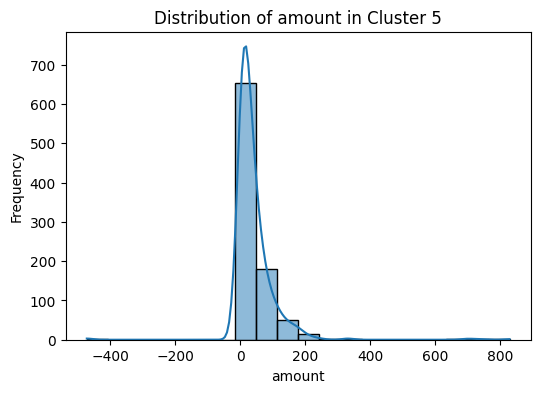

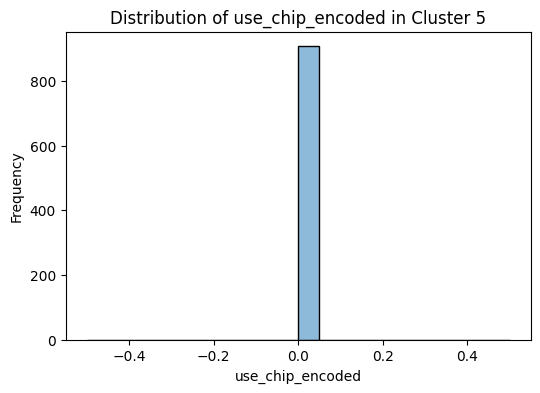

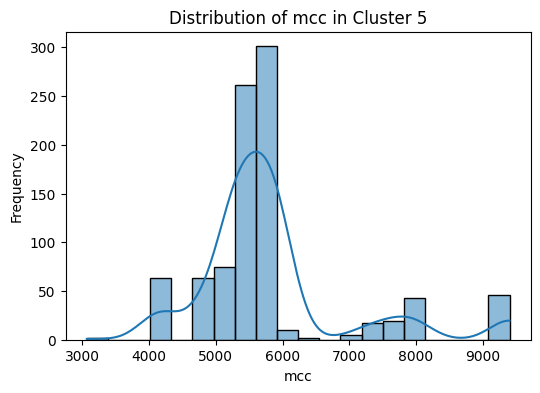

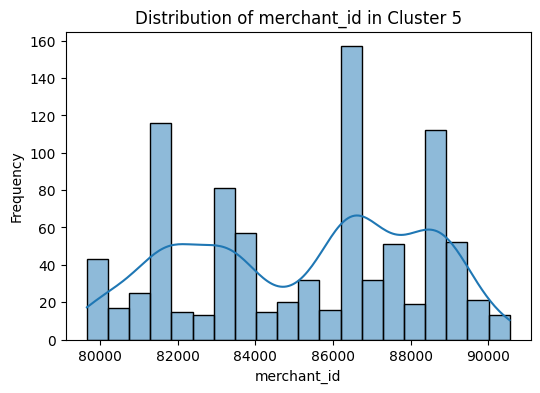

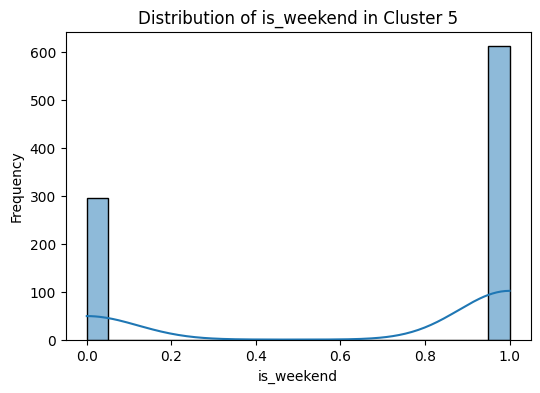


Cluster 9:
Number of Points: 510
Mean Values:
amount                 40.881000
use_chip_encoded        0.000000
mcc                  5702.913725
merchant_id         95901.970588
is_weekend              0.596078
cluster_kmeans          9.000000
dtype: float64
Median Values:
amount                 27.32
use_chip_encoded        0.00
mcc                  5658.00
merchant_id         96246.00
is_weekend              1.00
cluster_kmeans          9.00
dtype: float64
Standard Deviations:
amount                64.073402
use_chip_encoded       0.000000
mcc                  845.699917
merchant_id         2865.890109
is_weekend             0.491164
cluster_kmeans         0.000000
dtype: float64


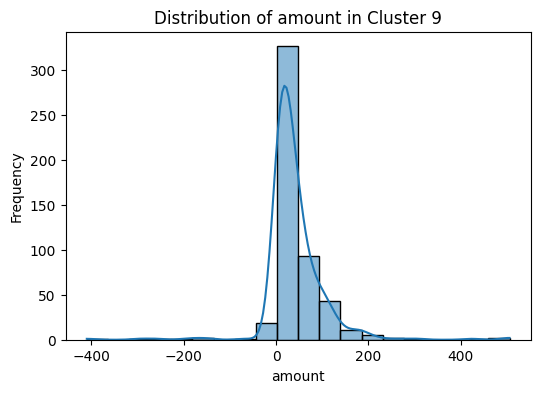

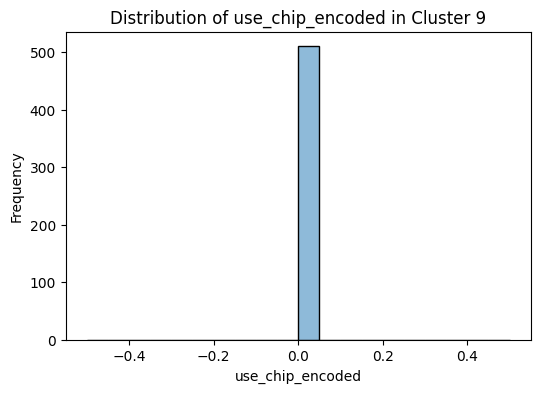

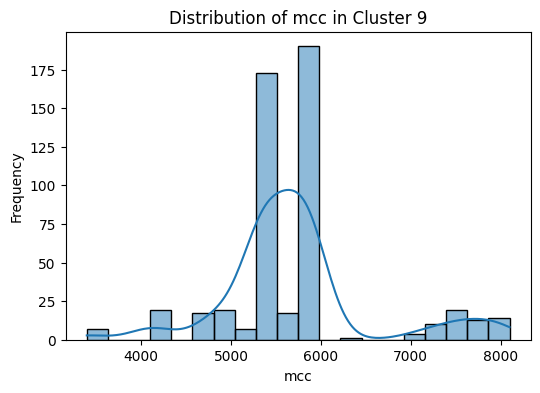

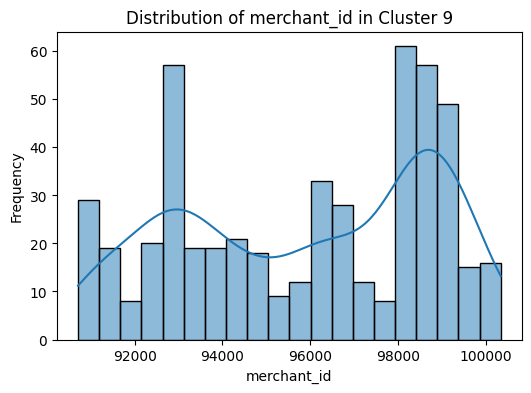

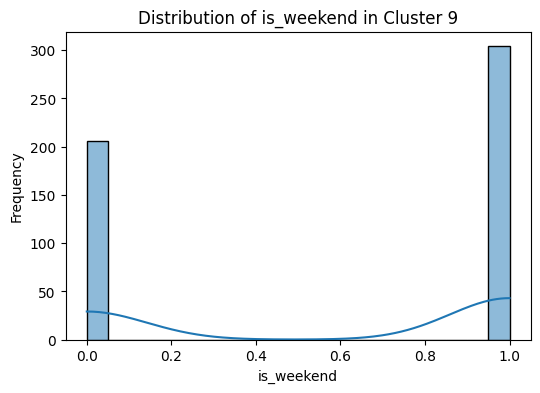

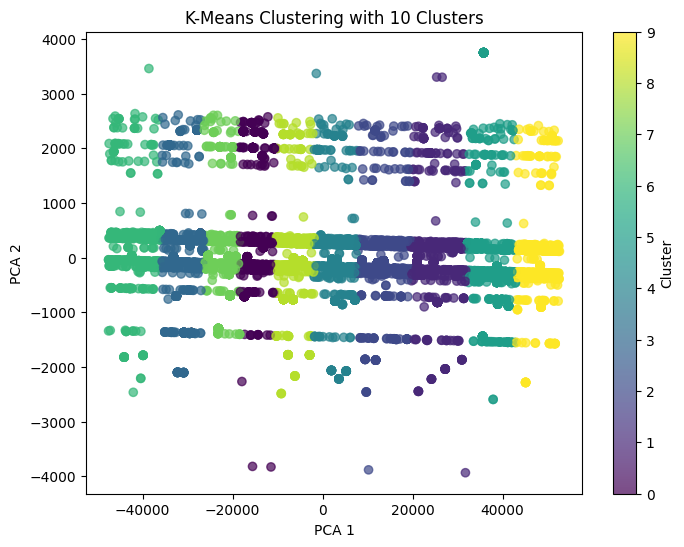

In [ ]:
    # Print K-Means results
    print(f"Best K-Means n_clusters={best_kmeans_n_clusters} -> Silhouette Score: {best_kmeans_score}")

    # Add cluster labels to the dataset
    kmeans_best_model = KMeans(n_clusters=best_kmeans_n_clusters, random_state=42)
    df_subset['cluster_kmeans'] = kmeans_best_model.fit_predict(df_subset)

    # Group by cluster and calculate descriptive statistics
    cluster_summary = df_subset.groupby('cluster_kmeans').agg(['mean', 'median', 'std'])  # Descriptive statistics
    print("\nCluster Summary (Descriptive Statistics per Cluster):")
    print(cluster_summary)

    # Detailed analysis for each cluster
    print("\nCluster Analysis:")
    for cluster_id in df_subset['cluster_kmeans'].unique():
        cluster_data = df_subset[df_subset['cluster_kmeans'] == cluster_id]
        print(f"\nCluster {cluster_id}:")
        print(f"Number of Points: {cluster_data.shape[0]}")
        print(f"Mean Values:\n{cluster_data.mean()}")
        print(f"Median Values:\n{cluster_data.median()}")
        print(f"Standard Deviations:\n{cluster_data.std()}")

        # Optional: Plot distribution for selected features in each cluster
        for feature in selected_features:
            plt.figure(figsize=(6, 4))
            sns.histplot(cluster_data[feature], kde=True, bins=20)
            plt.title(f'Distribution of {feature} in Cluster {cluster_id}')
            plt.xlabel(feature)
            plt.ylabel('Frequency')
            plt.show()

    # Visualize K-Means with PCA
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(df_subset[selected_features])

    plt.figure(figsize=(8, 6))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df_subset['cluster_kmeans'], cmap='viridis', alpha=0.7)
    plt.title(f"K-Means Clustering with {best_kmeans_n_clusters} Clusters")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.colorbar(label='Cluster')
    plt.show()



## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

Index(['id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors', 'use_chip_encoded', 'day_of_week', 'is_weekend'],
      dtype='object')
Silhouette Score (Original Data): 0.548107214009191
Silhouette Score (Variance Threshold Selected Data): 0.548107214009191
Silhouette Score (PCA Transformed Data): 0.5483943897772537


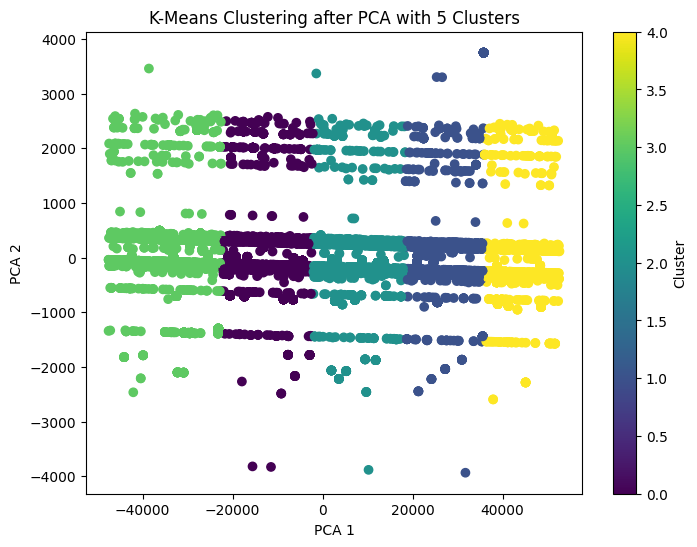

PCA-based clustering performs better.


In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

print(df.columns)

# Create df_subset with only the selected features
df_subset = df[selected_features]

# Limit the dataset to 10,000 rows
df_subset = df_subset.head(10000)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df_subset = pd.DataFrame(imputer.fit_transform(df_subset), columns=selected_features)

# --- Feature Selection using VarianceThreshold ---
# Removing features with low variance
selector = VarianceThreshold(threshold=0.1)  # Adjust threshold as needed
df_subset_selected = selector.fit_transform(df_subset)

# --- Feature Selection using PCA ---
# Apply PCA to reduce dimensions (Optional: you can choose the number of components)
pca = PCA(n_components=2)  # We can reduce to 2 components for simplicity
df_subset_pca = pca.fit_transform(df_subset)

# --- Clustering with Original Data ---
# K-Means clustering with original features
kmeans_original = KMeans(n_clusters=5, random_state=42)
labels_original = kmeans_original.fit_predict(df_subset[selected_features])
silhouette_original = silhouette_score(df_subset[selected_features], labels_original)

# --- Clustering with Feature-Selected Data (after Variance Threshold) ---
kmeans_selected = KMeans(n_clusters=5, random_state=42)
labels_selected = kmeans_selected.fit_predict(df_subset_selected)
silhouette_selected = silhouette_score(df_subset_selected, labels_selected)

# --- Clustering with PCA-Transformed Data ---
kmeans_pca = KMeans(n_clusters=5, random_state=42)
labels_pca = kmeans_pca.fit_predict(df_subset_pca)
silhouette_pca = silhouette_score(df_subset_pca, labels_pca)

# --- Results Comparison ---
print(f"Silhouette Score (Original Data): {silhouette_original}")
print(f"Silhouette Score (Variance Threshold Selected Data): {silhouette_selected}")
print(f"Silhouette Score (PCA Transformed Data): {silhouette_pca}")

# Plotting the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(df_subset_pca[:, 0], df_subset_pca[:, 1], c=labels_pca, cmap='viridis')
plt.title(f"K-Means Clustering after PCA with 5 Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()

# --- Conclusion ---
if silhouette_pca > silhouette_selected:
    print("PCA-based clustering performs better.")
else:
    print("Variance threshold selection performs better.")

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

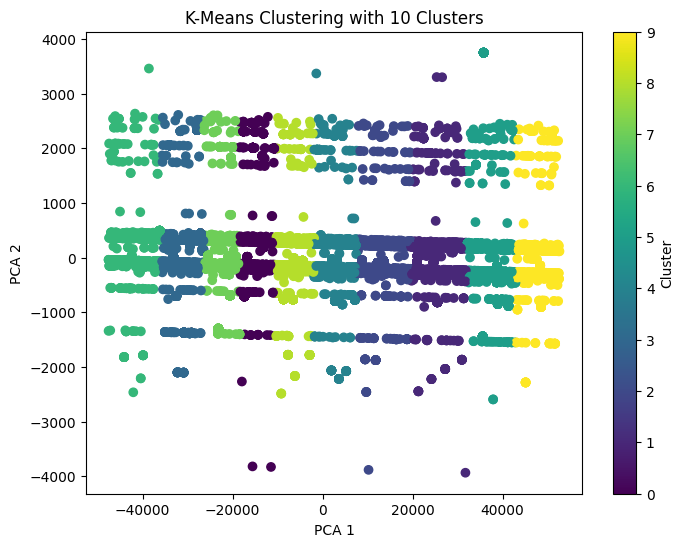

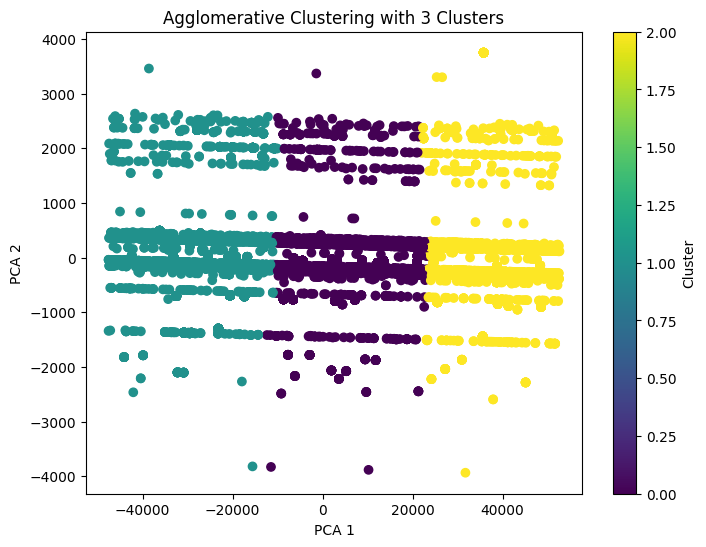

In [ ]:
# Visualize K-Means with PCA
kmeans_best_model = KMeans(n_clusters=best_kmeans_n_clusters, random_state=42)
df_subset['cluster_kmeans'] = kmeans_best_model.fit_predict(df_subset[selected_features])

pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_subset[selected_features])

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df_subset['cluster_kmeans'], cmap='viridis')
plt.title(f"K-Means Clustering with {best_kmeans_n_clusters} Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()

# Visualize Agglomerative Clustering with PCA
agg_best_model = AgglomerativeClustering(n_clusters=best_agglomerative_n_clusters)
df_subset['cluster_agglomerative'] = agg_best_model.fit_predict(df_subset[selected_features])

pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_subset[selected_features])

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df_subset['cluster_agglomerative'], cmap='viridis')
plt.title(f"Agglomerative Clustering with {best_agglomerative_n_clusters} Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

### **Cluster 0:**
- **Jumlah Data:** 611 (7.3% dari total data)
- **Karakteristik Data:**
  - **Rata-rata Jumlah Transaksi (Amount):** Tinggi (57.68), dengan standar deviasi besar (84.93), menunjukkan variasi transaksi yang signifikan.
  - **Rata-rata Kode MCC:** 6223 (Kategori merchant terkait restoran atau hiburan).
  - **Hari Weekend:** Tinggi (63.8%).
- **Wawasan:**  
  Cluster ini menggambarkan pelanggan dengan pola transaksi bernilai tinggi, terutama pada kategori hiburan dan makanan, serta lebih aktif berbelanja di akhir pekan. Hal ini menunjukkan bahwa strategi promosi seperti diskon khusus akhir pekan di restoran dapat efektif.

---

### **Cluster 1:**
- **Jumlah Data:** 1,067 (12.8% dari total data)
- **Karakteristik Data:**
  - **Rata-rata Jumlah Transaksi (Amount):** Moderat (43.74), dengan standar deviasi tinggi.
  - **Rata-rata Kode MCC:** 5634 (Kategori department store).
  - **Hari Weekend:** Relatif tinggi (60.8%).
- **Wawasan:**  
  Pelanggan dalam cluster ini lebih sering melakukan transaksi dengan nilai sedang di department store, terutama di akhir pekan. Insight ini dapat digunakan untuk mengatur penawaran musiman seperti diskon akhir pekan di toko fisik.

---

### **Cluster 2:**
- **Jumlah Data:** 1,594 (19.1% dari total data, cluster terbesar)
- **Karakteristik Data:**
  - **Rata-rata Jumlah Transaksi (Amount):** Rendah (32.26), dengan variasi sedang.
  - **Rata-rata Kode MCC:** 5503 (Kategori toko kelontong).
  - **Hari Weekend:** Cukup tinggi (63.4%).
- **Wawasan:**  
  Cluster ini terdiri dari pelanggan yang berbelanja rutin untuk kebutuhan sehari-hari dengan nilai transaksi kecil. Penawaran seperti diskon loyalitas atau kupon belanja bulanan dapat meningkatkan frekuensi belanja mereka.

---

### **Cluster 3:**
- **Jumlah Data:** 1,364 (16.3% dari total data)
- **Karakteristik Data:**
  - **Rata-rata Jumlah Transaksi (Amount):** Moderat (32.84), dengan median rendah (19.99), menunjukkan distribusi transaksi yang asimetris.
  - **Rata-rata Kode MCC:** 5390 (Belanja kebutuhan rumah tangga).
  - **Hari Weekend:** Cukup tinggi (63.7%).
- **Wawasan:**  
  Pelanggan dalam cluster ini berfokus pada belanja kebutuhan rumah tangga. Strategi seperti promosi bundling untuk barang rumah tangga dapat meningkatkan nilai transaksi mereka.

---

### **Cluster 4:**
- **Jumlah Data:** 978 (11.7% dari total data)
- **Karakteristik Data:**
  - **Rata-rata Jumlah Transaksi (Amount):** Moderat (36.28), dengan median rendah (19.85).
  - **Rata-rata Kode MCC:** 5524 (Barang kebutuhan sehari-hari).
  - **Hari Weekend:** 62.1%.
- **Wawasan:**  
  Mirip dengan Cluster 3, tetapi dengan nilai transaksi rata-rata lebih besar. Penawaran berbasis volume seperti "beli dua gratis satu" dapat menarik minat pelanggan.

---

### **Cluster 5:**
- **Jumlah Data:** 907 (10.9% dari total data)
- **Karakteristik Data:**
  - **Rata-rata Jumlah Transaksi (Amount):** Moderat (41.13), dengan median yang relatif rendah (23.08).
  - **Rata-rata Kode MCC:** 5826 (Barang elektronik atau hiburan).
  - **Hari Weekend:** Tinggi (67.4%).
- **Wawasan:**  
  Pelanggan dalam cluster ini cenderung membeli barang elektronik atau hiburan dengan frekuensi tinggi pada akhir pekan. Strategi promosi dapat berupa cashback untuk pembelian di kategori ini.

---

### **Cluster 6:**
- **Jumlah Data:** 556 (6.7% dari total data, cluster terkecil)
- **Karakteristik Data:**
  - **Rata-rata Jumlah Transaksi (Amount):** Tinggi (49.29), dengan standar deviasi besar.
  - **Rata-rata Kode MCC:** 5710 (Kategori furnitur atau peralatan rumah).
  - **Hari Weekend:** 66%.
- **Wawasan:**  
  Pelanggan ini memiliki pola belanja bernilai besar, terutama untuk furnitur atau barang bernilai tinggi. Penawaran seperti cicilan nol persen atau promo cashback dapat menarik lebih banyak pelanggan dari cluster ini.

---

### **Cluster 7:**
- **Jumlah Data:** 1,323 (15.8% dari total data)
- **Karakteristik Data:**
  - **Rata-rata Jumlah Transaksi (Amount):** Tinggi (53.42), dengan median besar (49.64).
  - **Rata-rata Kode MCC:** 5411 (Supermarket).
  - **Hari Weekend:** 64.2%.
- **Wawasan:**  
  Cluster ini menggambarkan pelanggan dengan frekuensi belanja tinggi di supermarket, sering kali dengan transaksi bernilai besar. Penawaran seperti "happy hour" di akhir pekan dapat menarik perhatian mereka.

---

### **Cluster 8:**
- **Jumlah Data:** 1,090 (13% dari total data)
- **Karakteristik Data:**
  - **Rata-rata Jumlah Transaksi (Amount):** Moderat (36.09), dengan standar deviasi besar (87.15).
  - **Rata-rata Kode MCC:** 5320 (Apotek atau toko bahan makanan).
  - **Hari Weekend:** Cukup tinggi (58.5%).
- **Wawasan:**  
  Pelanggan ini memiliki variasi transaksi yang besar, sering berbelanja kebutuhan kesehatan atau bahan makanan. Program loyalitas berbasis poin dapat meningkatkan keterlibatan mereka.

---

### **Cluster 9:**
- **Jumlah Data:** 510 (6.1% dari total data)
- **Karakteristik Data:**
  - **Rata-rata Jumlah Transaksi (Amount):** Moderat (40.88), dengan standar deviasi sedang (64.07).
  - **Rata-rata Kode MCC:** 5702 (Barang fashion atau aksesori).
  - **Hari Weekend:** Cukup tinggi (59.6%).
- **Wawasan:**  
  Cluster ini menunjukkan pelanggan yang lebih fokus pada belanja fashion atau aksesori. Promo eksklusif seperti "flash sale" dapat menarik minat mereka.

---

### Kesimpulan:  
1. Sebagian besar cluster menunjukkan kecenderungan belanja pada akhir pekan, sehingga promosi berbasis waktu dapat memberikan dampak besar.
2. Setiap cluster memiliki fokus kategori yang berbeda, seperti supermarket, elektronik, atau barang rumah tangga, sehingga strategi pemasaran yang disesuaikan per kategori lebih efektif.
3. Distribusi rata-rata transaksi menunjukkan pola yang signifikan: pelanggan dengan belanja besar cenderung memilih kategori seperti furnitur atau hiburan, sedangkan belanja kecil lebih dominan pada kebutuhan sehari-hari.

### Insight untuk Analisis Lanjut:
1. Lakukan segmentasi lebih dalam berdasarkan lokasi atau metode pembayaran untuk memahami preferensi spesifik.
2. Analisis hubungan antara hari belanja dan total pengeluaran untuk menentukan waktu optimal promosi.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Tentukan lokasi penyimpanan di Google Drive
output_path = '/content/drive/My Drive/clustering_results.csv'  # Ubah sesuai struktur folder di Google Drive Anda

# Simpan file ke Google Drive
df_subset.to_csv(output_path, index=False)

print(f"Hasil clustering telah disimpan di Google Drive: {output_path}")


Mounted at /content/drive
Hasil clustering telah disimpan di Google Drive: /content/drive/My Drive/clustering_results.csv
